In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [14]:
model = ChatOllama(model="llama3")
google_model = ChatGoogleGenerativeAI(model="models/gemini-flash-latest")

In [15]:
class BlogState(TypedDict):
    title: str
    outline: str
    blog: str
    rating: str

In [4]:
def create_outline(state: BlogState):
    # fetch titel
    title = state["title"]

    # call llm gen outline
    prompt = f"Generate an outline for a blog on the topic - {title}"
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [5]:
def create_blog(state: BlogState):

    title = state["title"]
    outline = state['outline']

    prompt = f"Write a detailed blog on the title - {title} using the following outline:\n {outline}"

    blog = google_model.invoke(prompt).content
    state['blog'] = blog

    return state

In [6]:
def evaluate_blog(state: BlogState):
    outline = state['outline']
    blog = state['blog']

    prompt = f"Evaluate the content of blog: \n {blog} \n based on outline \n {outline} and provide integer rating for the same"

    rating = model.invoke(prompt).content
    state['rating'] = rating
    return state

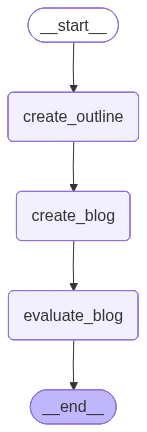

In [7]:
# Create Graph
graph = StateGraph(BlogState)

# node
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)


# edge creation

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()
workflow

In [8]:
inital_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(inital_state)
print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here is a suggested outline for a blog on "Rise of AI in India":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its significance\n* Importance of AI in today\'s digital age\n* Thesis statement: The rise of AI in India holds immense potential for the country\'s economic growth, job market, and overall development.\n\n**II. Current State of AI in India**\n\n* Overview of the current AI landscape in India\n* Key players in the Indian AI industry (e.g., startups, research institutions, government initiatives)\n* Examples of AI adoption in various sectors (e.g., healthcare, finance, education)\n\n**III. Drivers of AI Adoption in India**\n\n* Government initiatives and policies supporting AI development (e.g., AI for All program, National Policy on Artificial Intelligence)\n* Rise of startups and entrepreneurship in the AI space\n* Increased demand for AI-driven solutions from industries (e.g., manufacturing, retail

```json
{'title': 'Rise of AI in India', 'outline': 'Here is a suggested outline for a blog on "Rise of AI in India":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its significance\n* Importance of AI in today\'s digital age\n* Thesis statement: The rise of AI in India holds immense potential for the country\'s economic growth, job market, and overall development.\n\n**II. Current State of AI in India**\n\n* Overview of the current AI landscape in India\n* Key players in the Indian AI industry (e.g., startups, research institutions, government initiatives)\n* Examples of AI adoption in various sectors (e.g., healthcare, finance, education)\n\n**III. Drivers of AI Adoption in India**\n\n* Government initiatives and policies supporting AI development (e.g., AI for All program, National Policy on Artificial Intelligence)\n* Rise of startups and entrepreneurship in the AI space\n* Increased demand for AI-driven solutions from industries (e.g., manufacturing, retail, logistics)\n* Availability of skilled talent and researchers in AI-related fields\n\n**IV. Impact of AI on Indian Economy**\n\n* Job creation and employment opportunities in the AI sector\n* Improved productivity and efficiency in various industries (e.g., manufacturing, healthcare)\n* Enhanced customer experience through AI-powered services (e.g., chatbots, virtual assistants)\n\n**V. Challenges and Concerns**\n\n* Data privacy and security concerns in the age of AI\n* Job displacement and re-skilling required for workers affected by AI adoption\n* Ensuring fairness and transparency in AI decision-making processes\n\n**VI. Future Outlook**\n\n* Predictions on the future of AI in India (e.g., increased adoption, new use cases, innovation)\n* Emerging trends and areas of focus (e.g., edge AI, natural language processing, computer vision)\n\n**VII. Conclusion**\n\n* Recap of the rise of AI in India\n* Call to action for readers to stay informed about AI developments and its impact on the Indian economy\n\nThis outline should provide a good structure for exploring the topic of AI\'s rise in India. Remember to keep your blog post concise, informative, and engaging!', 'blog': '# The AI Ascent: Charting the Rise of Artificial Intelligence in India\n\nArtificial Intelligence (AI) is no longer a technology of the distant future; it is the fundamental operating system of the present. As the world races to harness the power of machine learning, deep learning, and cognitive computing, India is rapidly positioning itself as a global AI powerhouse.\n\nThe synergy of a massive digital consumer base, burgeoning talent, and proactive government support has created an unparalleled environment for technological acceleration.\n\n***\n\n## I. Introduction\n\nIn a world increasingly driven by data, Artificial Intelligence stands out as the transformative technology of our era. AI—the simulation of human intelligence processes by machines—is reshaping everything from healthcare diagnostics to financial trading. Its significance in today’s digital age lies in its ability to automate complex tasks, derive actionable insights from massive datasets, and create personalized experiences at scale.\n\nFor a developing nation like India, AI offers a unique opportunity to leapfrog traditional stages of development.\n\n**Thesis Statement:** The rise of AI in India holds immense potential for the country\'s economic growth, job market transformation, and overall societal development, provided the challenges of data governance and skilling are strategically addressed.\n\n***\n\n## II. Current State of AI in India\n\nIndia’s AI landscape is characterized by rapid maturity and widespread sectoral integration, moving beyond simple automation to complex decision-making systems.\n\n### Overview of the Current AI Landscape\n\nThe Indian AI market is projected to grow significantly, fueled by high consumer demand and the push for digital transformation across industries. The focus is increasingly on building AI solutions tailored to India\'s unique challenges, particularly those involving linguistic diversity and low-resource environments.\n\n### Key Players in the Indian AI Industry\n\nThe ecosystem is vibrant, involving three major stakeholder groups:\n\n1.  **Startups and Innovators:** India hosts hundreds of AI-focused startups, many of which have achieved unicorn status (e.g., those specializing in conversational AI, logistics optimization, and FinTech fraud detection). They are the primary engine of agile innovation.\n2.  **Established Tech Giants:** Major IT service providers like Tata Consultancy Services (TCS), Infosys, and Wipro are heavily investing in AI research and services, creating dedicated AI centers of excellence to serve both domestic and international clients.\n3.  **Research Institutions:** Premier institutions like the Indian Institutes of Technology (IITs) and the Indian Institute of Science (IISc) are pivotal in generating fundamental research and nurturing top-tier talent.\n\n### Examples of AI Adoption in Various Sectors\n\nAI is deeply integrated into India\'s core sectors:\n\n*   **Healthcare:** AI is deployed for early disease detection (especially in radiology and ophthalmology), drug discovery, and managing public health data (e.g., pandemic tracking).\n*   **Finance (FinTech):** Banking and financial services utilize AI for algorithmic trading, credit scoring for underserved populations, and robust real-time fraud prevention systems.\n*   **Education (EdTech):** AI-powered platforms offer personalized learning paths, adaptive testing, and automated grading, helping to address the massive student-to-teacher ratio challenge.\n\n***\n\n## III. Drivers of AI Adoption in India\n\nThe explosive growth of AI in India is not accidental; it is driven by a confluence of supportive policies, market dynamics, and human capital.\n\n### Government Initiatives and Policies Supporting AI Development\n\nThe Indian government has adopted a proactive, national strategy focused on "AI for All," emphasizing inclusive development.\n\n*   **National Policy on Artificial Intelligence:** Led by NITI Aayog, this policy outlines the strategic direction, focusing on leveraging AI for social impact in areas like agriculture and healthcare.\n*   **National AI Portal (IndiaAI):** This central hub acts as a repository for AI-related news, resources, and research, fostering collaboration between academia, industry, and government.\n*   **Digital India Program:** The foundational digital infrastructure (Aadhaar, UPI) provides a massive, digitized dataset essential for training sophisticated AI models.\n\n### Rise of Startups and Entrepreneurship\n\nIndia’s entrepreneurial spirit has found fertile ground in AI. Startups are rapidly developing localized solutions—from vernacular language processing to precision farming—attracting significant venture capital investment and pushing the boundaries of applied technology.\n\n### Increased Demand for AI-Driven Solutions\n\nIndustries facing intense competition and scalability issues are turning to AI.\n\n*   **Logistics and E-commerce:** AI optimizes complex supply chains, manages warehousing, and predicts delivery bottlenecks, crucial for servicing India’s vast geography.\n*   **Manufacturing:** Predictive maintenance using AI sensors minimizes downtime, increasing overall operational efficiency.\n\n### Availability of Skilled Talent and Researchers\n\nIndia possesses one of the world’s largest pools of STEM graduates. This existing talent base, combined with concerted efforts to re-skill the workforce in areas like machine learning and data science, provides the fundamental human capital necessary for sustained AI growth.\n\n***\n\n## IV. Impact of AI on Indian Economy\n\nThe economic impact of AI is profound, promising to elevate India’s global competitive standing.\n\n### Job Creation and Employment Opportunities\n\nWhile concerns about job automation persist, AI is primarily a job transformer and creator. It is generating entirely new, high-value roles:\n\n*   **Data Scientists and AI Engineers:** Building and deploying models.\n*   **AI Ethics and Governance Specialists:** Ensuring responsible deployment.\n*   **Prompt Engineers:** Maximizing the utility of large language models (LLMs).\n\nThis shift requires a focus on upskilling the existing workforce rather than fearing displacement.\n\n### Improved Productivity and Efficiency\n\nAI systems are driving unprecedented efficiency gains:\n\n*   In **Manufacturing**, AI reduces waste and optimizes energy consumption.\n*   In **Healthcare**, AI accelerates diagnostic turnaround times, allowing doctors to focus on complex patient care.\n*   In **Agriculture**, AI-driven crop monitoring and yield prediction lead to better resource management and higher farmer incomes.\n\n### Enhanced Customer Experience through AI-Powered Services\n\nAI is revolutionizing how businesses interact with consumers, particularly through language-agnostic solutions.\n\n*   **Chatbots and Virtual Assistants:** These tools provide instant, 24/7 customer support, increasingly available in major Indian regional languages, thereby boosting accessibility and customer satisfaction.\n*   **Personalized Recommendations:** Retail and entertainment platforms use AI to curate experiences, significantly increasing engagement and revenue.\n\n***\n\n## V. Challenges and Concerns\n\nFor AI to realize its full potential, India must navigate critical ethical, regulatory, and social hurdles.\n\n### Data Privacy and Security Concerns\n\nThe sheer volume of data generated by India’s 1.4 billion people necessitates robust protective measures. Concerns over data sovereignty, cross-border data flow, and the security of sensitive personal information remain paramount, driving the need for frameworks like the Digital Personal Data Protection (DPDP) Act.\n\n### Job Displacement and Re-skilling\n\nThe automation of routine clerical and manual tasks is inevitable. This requires massive, government-supported re-skilling initiatives to transition workers into roles that require uniquely human skills like creativity, complex problem-solving, and emotional intelligence. Failure to do so risks exacerbating economic inequality.\n\n### Ensuring Fairness and Transparency\n\nAI models, if trained on biased or incomplete datasets, can perpetuate and amplify existing societal biases (e.g., gender, regional, or caste bias) in areas like hiring, lending, or law enforcement. India needs strict regulatory oversight to ensure algorithmic transparency and fairness in AI decision-making processes, upholding the principle of "AI for All."\n\n***\n\n## VI. Future Outlook\n\nThe future of AI in India is bright, marked by deeper integration into public service delivery and increasing global influence.\n\n### Predictions on the Future of AI in India\n\nIndia is poised to become a major hub for AI development, particularly in creating scalable, low-cost solutions relevant to the developing world. We can expect:\n\n1.  **Increased Adoption in Governance:** AI will play a greater role in public service delivery, optimizing tax collection, traffic management, and disaster response.\n2.  **Hyper-Localization:** AI solutions will increasingly be customized to function effectively in Tier 2 and Tier 3 cities, addressing regional linguistic and infrastructural nuances.\n3.  **Global AI Leadership:** India’s large talent pool will attract more multinational corporations to establish AI research and development centers in the country.\n\n### Emerging Trends and Areas of Focus\n\nFuture innovation will center around specific technological frontiers:\n\n*   **Natural Language Processing (NLP):** Crucial focus on developing sophisticated NLP models that can accurately understand and generate text in India’s 22 official languages and hundreds of dialects.\n*   **Edge AI:** Deploying AI processing capabilities directly onto devices (like cameras and sensors) rather than relying solely on the cloud. This is vital for areas with inconsistent internet connectivity.\n*   **Computer Vision:** Used extensively in smart city projects, infrastructure monitoring, security surveillance, and improving agricultural efficiency through drone-based monitoring.\n\n***\n\n## VII. Conclusion\n\nThe rise of AI in India is more than a technological trend; it is a national transformation strategy. From government initiatives that lay the regulatory groundwork to the vibrant startup ecosystem driving innovation, India is embracing AI as the key engine for achieving its goal of becoming a developed economy.\n\nWhile the path forward involves overcoming significant challenges related to ethics, data security, and workforce re-skilling, the potential rewards—economic growth, enhanced productivity, and societal upliftment—are immense.\n\n**Call to Action:** The AI revolution demands active participation. We urge readers—policymakers, entrepreneurs, students, and professionals—to stay informed about AI developments, invest in re-skilling, and engage in the critical dialogue necessary to ensure that AI in India is developed responsibly, ethically, and inclusively for the benefit of every citizen.', 'rating': "**Content Evaluation:**\n\nI would rate the content of this blog post as 8 out of 10.\n\n**Strengths:**\n\n1. **Comprehensive overview**: The post provides a thorough introduction to AI's rise in India, covering its significance, current state, drivers, impact, and future outlook.\n2. **Well-structured outline**: The article follows a logical structure, making it easy for readers to follow along.\n3. **In-depth insights**: The post delves into specific sectors, such as healthcare, finance, and education, providing concrete examples of AI adoption.\n4. **Emphasis on government initiatives**: The blog highlights the role of government policies and initiatives in supporting India's AI growth.\n\n**Weaknesses:**\n\n1. **Lack of new or surprising information**: While the post is informative, it may not offer groundbreaking insights or surprising statistics that would make readers sit up and take notice.\n2. **Overemphasis on technology**: The article could benefit from a more balanced approach by exploring the human aspects of AI adoption in India (e.g., social implications, job market effects).\n3. **Some sections feel repetitive**: The post occasionally repeats itself, such as when discussing the benefits of AI adoption in different sectors.\n\n**Suggestions for improvement:**\n\n1. **Add more diverse perspectives**: Incorporate quotes or insights from industry experts, policymakers, or individuals affected by AI adoption to provide a more well-rounded view.\n2. **Provide concrete examples and statistics**: Use specific data points or case studies to illustrate the impact of AI on India's economy and society.\n3. **Emphasize the importance of responsible AI development**: Expand on the challenges related to AI ethics, data privacy, and transparency, as these are crucial aspects of AI adoption in India.\n\nOverall, this blog post provides a solid foundation for understanding AI's rise in India. With some refinements to address the weaknesses mentioned above, it could become an even more compelling and informative read."}
```

In [9]:
final_state['title']

'Rise of AI in India'

In [10]:
final_state['outline']

'Here is a suggested outline for a blog on "Rise of AI in India":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its significance\n* Importance of AI in today\'s digital age\n* Thesis statement: The rise of AI in India holds immense potential for the country\'s economic growth, job market, and overall development.\n\n**II. Current State of AI in India**\n\n* Overview of the current AI landscape in India\n* Key players in the Indian AI industry (e.g., startups, research institutions, government initiatives)\n* Examples of AI adoption in various sectors (e.g., healthcare, finance, education)\n\n**III. Drivers of AI Adoption in India**\n\n* Government initiatives and policies supporting AI development (e.g., AI for All program, National Policy on Artificial Intelligence)\n* Rise of startups and entrepreneurship in the AI space\n* Increased demand for AI-driven solutions from industries (e.g., manufacturing, retail, logistics)\n* Availability of skilled tale

In [11]:
final_state['blog']

'# The AI Ascent: Charting the Rise of Artificial Intelligence in India\n\nArtificial Intelligence (AI) is no longer a technology of the distant future; it is the fundamental operating system of the present. As the world races to harness the power of machine learning, deep learning, and cognitive computing, India is rapidly positioning itself as a global AI powerhouse.\n\nThe synergy of a massive digital consumer base, burgeoning talent, and proactive government support has created an unparalleled environment for technological acceleration.\n\n***\n\n## I. Introduction\n\nIn a world increasingly driven by data, Artificial Intelligence stands out as the transformative technology of our era. AI—the simulation of human intelligence processes by machines—is reshaping everything from healthcare diagnostics to financial trading. Its significance in today’s digital age lies in its ability to automate complex tasks, derive actionable insights from massive datasets, and create personalized expe

In [12]:
final_state['rating']

"**Content Evaluation:**\n\nI would rate the content of this blog post as 8 out of 10.\n\n**Strengths:**\n\n1. **Comprehensive overview**: The post provides a thorough introduction to AI's rise in India, covering its significance, current state, drivers, impact, and future outlook.\n2. **Well-structured outline**: The article follows a logical structure, making it easy for readers to follow along.\n3. **In-depth insights**: The post delves into specific sectors, such as healthcare, finance, and education, providing concrete examples of AI adoption.\n4. **Emphasis on government initiatives**: The blog highlights the role of government policies and initiatives in supporting India's AI growth.\n\n**Weaknesses:**\n\n1. **Lack of new or surprising information**: While the post is informative, it may not offer groundbreaking insights or surprising statistics that would make readers sit up and take notice.\n2. **Overemphasis on technology**: The article could benefit from a more balanced appr